In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r'c:/Users/honey/Documents/placment work/Electronical-AI-Device-Recogniser/khanya/data managment/acs-f2-dataset.csv'
data = pd.read_csv(file_path)

# Separating features and target (assuming 'equipment' is the target)
X = data.drop(columns=['equipment', 'time'])  # Dropping time and target columns
y = data['equipment']  # Assuming equipment is the label

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Shuffle and batch the datasets
BATCH_SIZE = 32

train_dataset = train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


In [26]:
# Split features and labels
X = df.drop('equipment', axis=1)
y = df['equipment']


In [27]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Convert labels to one-hot encoding
y_encoded = to_categorical(y)


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [33]:
# Define the model with architectural improvements
#changes made:  Increased neurons in first layer# Batch normalization to stabilize learning,Higher dropout for regularization, More neurons for deeper architecture, Another batch normalization layer
# Softmax for multi-class classification, A third hidden layer with 128 neurons
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  
    Dropout(0.3),  
    Dense(256, activation='relu'),  
    BatchNormalization(), 
    Dropout(0.3),  # Regularization
    Dense(128, activation='relu'),  
    Dense(y_encoded.shape[1], activation='softmax')  
])

# Learning rate scheduler for adaptive learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

c:\Users\honey\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model with the learning rate schedule
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=1000, callbacks=[early_stopping])


Epoch 1/1000


3397/3397 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3926 - loss: 1.7661 - val_accuracy: 0.6073 - val_loss: 1.1423
Epoch 2/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5553 - loss: 1.2267 - val_accuracy: 0.6588 - val_loss: 0.9635
Epoch 3/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6073 - loss: 1.0808 - val_accuracy: 0.6785 - val_loss: 0.8842
Epoch 4/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6308 - loss: 1.0090 - val_accuracy: 0.7004 - val_loss: 0.8329
Epoch 5/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6462 - loss: 0.9703 - val_accuracy: 0.7019 - val_loss: 0.8207
Epoch 6/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6552 - loss: 0.9407 - val_accuracy: 0.7137 - val_loss: 0.8020
Epoch 7/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6650 - loss: 0.9158 - val_accuracy: 0.7083 - val_loss: 0.7984
Epoch 8/1000
3397/3397 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6701 - loss: 0.8991

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 0.7816
Test loss: 0.6082


In [37]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

850/850 - 1s - 727us/step - accuracy: 0.7816 - loss: 0.6082
Test accuracy: 0.7816087603569031


In [38]:
# Generate a classification report
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred))

850/850 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1760
           1       0.99      0.98      0.99      1692
           2       0.66      0.53      0.59      1858
           3       0.89      0.50      0.64      1990
           4       0.99      0.97      0.98      1802
           5       0.37      0.89      0.52      1906
           6       0.72      0.67      0.70      1844
           7       0.66      0.82      0.73      1879
           8       0.95      0.95      0.95      1841
           9       0.96      0.66      0.78      1682
          10       0.92      0.83      0.87      1756
          11       0.96      0.96      0.96      1801
          12       0.71      0.86      0.78      1710
          13       0.94      0.45      0.61      1791
          14       0.96      0.95      0.95      1864

    accuracy                           0.78     27176
   macro avg       0.84      0.78    

In [39]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

850/850 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step


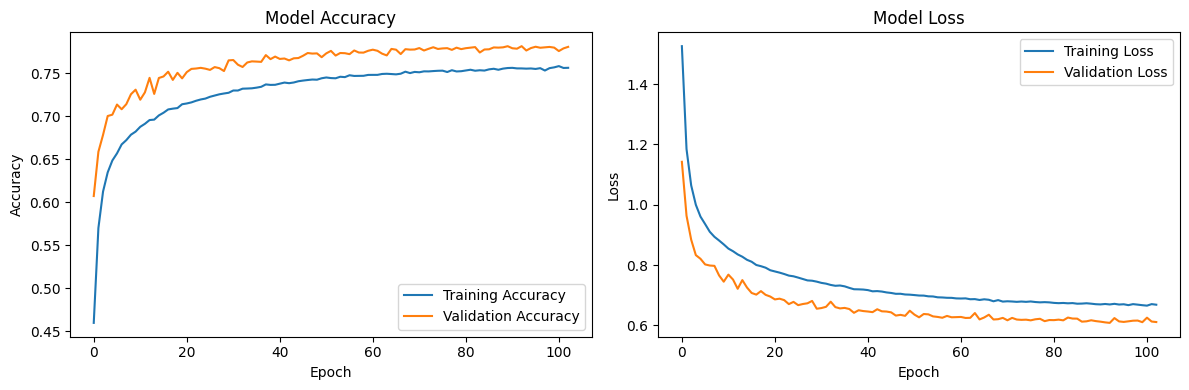

In [40]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

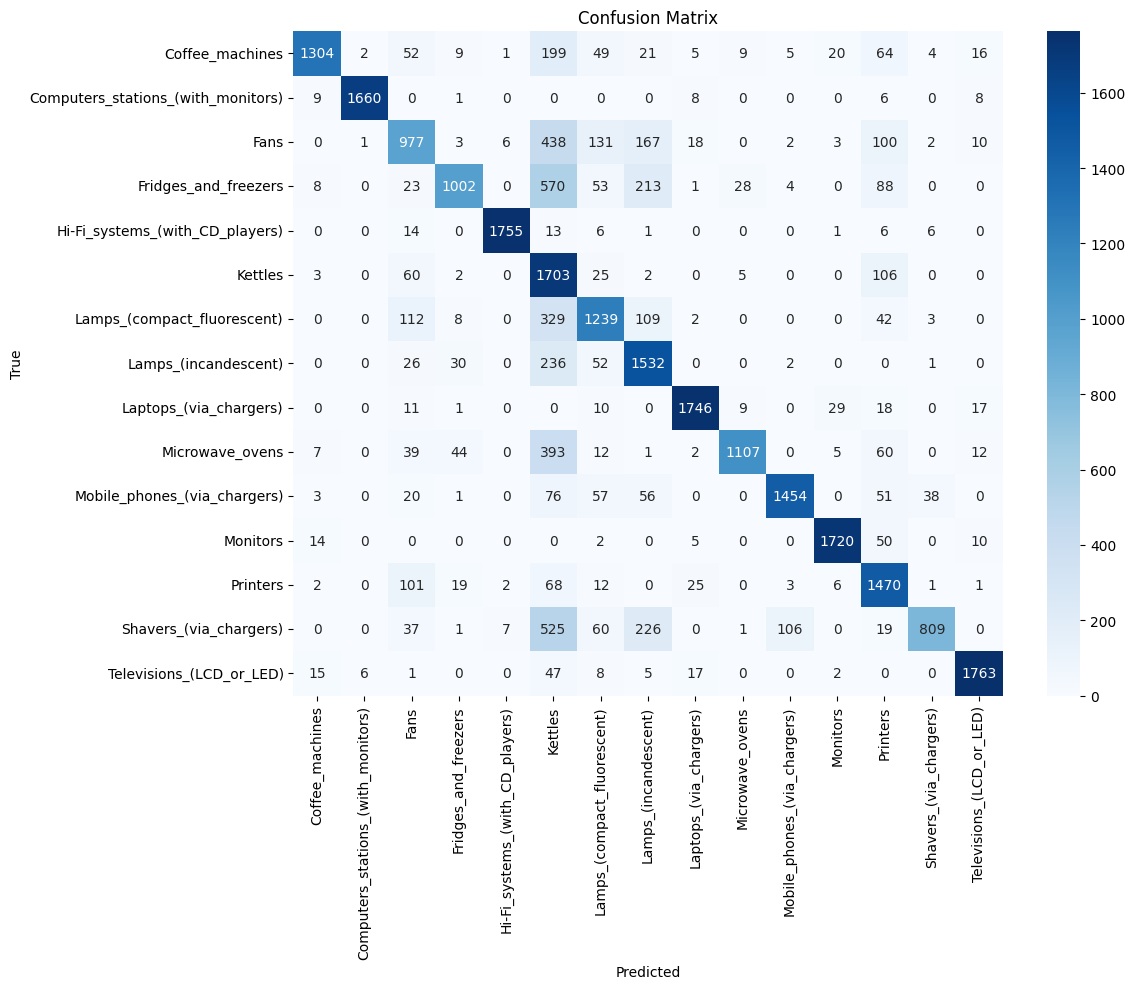

In [41]:
# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [42]:
# Function to predict appliance and probabilities
def predict_appliance(electrical_readings):
    # Ensure the input is a 2D array
    if electrical_readings.ndim == 1:
        electrical_readings = electrical_readings.reshape(1, -1)
    
    # Scale the input
    scaled_input = scaler.transform(electrical_readings)
    
    # Make prediction
    probabilities = model.predict(scaled_input)[0]
    predicted_class = le.inverse_transform([np.argmax(probabilities)])[0]
    
    return predicted_class, probabilities

In [43]:
# Example usage
example_reading = np.array([50.0, 340, 111.284, -40.89, 0.533, 224.038])
predicted_appliance, probabilities = predict_appliance(example_reading)

print(f"Predicted appliance: {predicted_appliance}")
print("Probabilities for each appliance:")
for appliance, prob in zip(le.classes_, probabilities):
    print(f"{appliance}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted appliance: Televisions_(LCD_or_LED)
Probabilities for each appliance:
Coffee_machines: 0.0000
Computers_stations_(with_monitors): 0.0002
Fans: 0.0000
Fridges_and_freezers: 0.0000
Hi-Fi_systems_(with_CD_players): 0.0000
Kettles: 0.0000
Lamps_(compact_fluorescent): 0.0000
Lamps_(incandescent): 0.0000
Laptops_(via_chargers): 0.0000
Microwave_ovens: 0.0000
Mobile_phones_(via_chargers): 0.0000
Monitors: 0.0000
Printers: 0.0000
Shavers_(via_chargers): 0.0000
Televisions_(LCD_or_LED): 0.9998


c:\Users\honey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


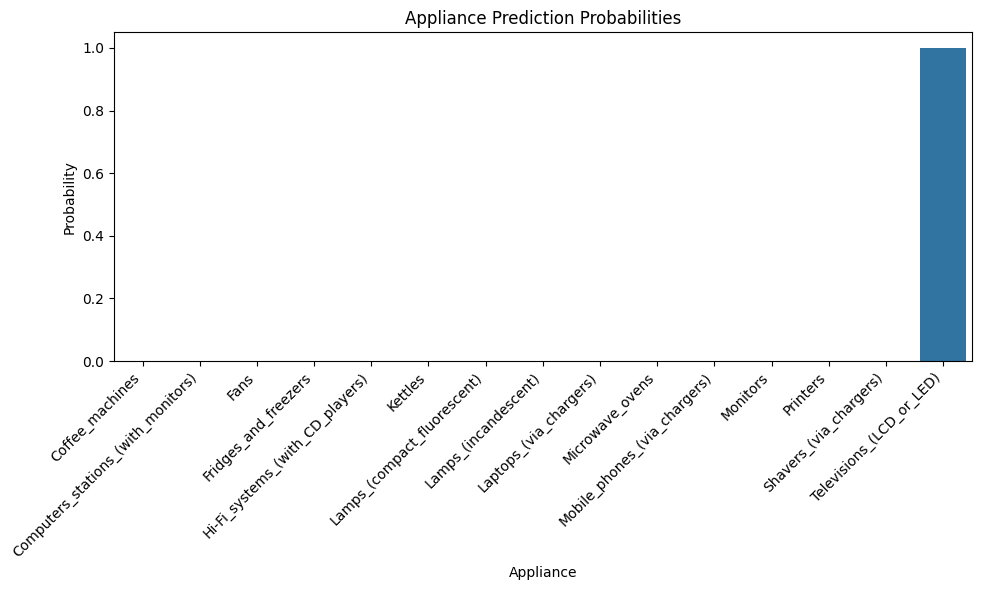

In [44]:

# Plot probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x=le.classes_, y=probabilities)
plt.title('Appliance Prediction Probabilities')
plt.xlabel('Appliance')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
import joblib
joblib.dump(scaler, 'scaler1.0.6.pkl')

model.save('appliance_recogniser#1.0.6.keras')